<a href="https://colab.research.google.com/github/vnscience/DataMining/blob/main/KPDL_BTH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Câu 1: Ôn tập và chuẩn bị dữ liệu

In [1]:
# import thư viện cần thiết
import pandas as pd
# 1.1 Tải bộ dữ liệu
url = "https://github.com/anhdung98/diem_thi_2024/releases/download/240717/diem_thi_thpt_2024.csv"
df = pd.read_csv(url)
df.info()
df_sample = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1061605 non-null  int64  
 1   toan          1045613 non-null  float64
 2   ngu_van       1050101 non-null  float64
 3   ngoai_ngu     912705 non-null   float64
 4   vat_li        345615 non-null   float64
 5   hoa_hoc       346518 non-null   float64
 6   sinh_hoc      342378 non-null   float64
 7   lich_su       706214 non-null   float64
 8   dia_li        704682 non-null   float64
 9   gdcd          583609 non-null   float64
 10  ma_ngoai_ngu  912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB


In [2]:
df_sample.rename(columns={
    'sbd'       : 'ID',
    'toan'      : 'Toan',
    'ngu_van'   : 'Ngu Van',
    'vat_li'    : 'Vat Ly',
    'hoa_hoc'   : 'Hoa Hoc',
    'sinh_hoc'  : 'Sinh Hoc',
    'lich_su'   : 'Lich Su',
    'dia_li'    : 'Dia Ly',
    'gdcd'      : 'GDCD',
    'ngoai_ngu'  : 'Ngoai Ngu',
    'ma_ngoai_ngu' : 'Ma NN'
}, inplace=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ID         1061605 non-null  int64  
 1   Toan       1045613 non-null  float64
 2   Ngu Van    1050101 non-null  float64
 3   Ngoai Ngu  912705 non-null   float64
 4   Vat Ly     345615 non-null   float64
 5   Hoa Hoc    346518 non-null   float64
 6   Sinh Hoc   342378 non-null   float64
 7   Lich Su    706214 non-null   float64
 8   Dia Ly     704682 non-null   float64
 9   GDCD       583609 non-null   float64
 10  Ma NN      912705 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 89.1+ MB


In [3]:
# 1.2 Lấy mẫu ngẫu nhiên 50000 thí sinh
df_sample = df_sample.sample(n=50000, random_state=42)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 79883 to 192941
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         50000 non-null  int64  
 1   Toan       49253 non-null  float64
 2   Ngu Van    49482 non-null  float64
 3   Ngoai Ngu  43100 non-null  float64
 4   Vat Ly     16253 non-null  float64
 5   Hoa Hoc    16300 non-null  float64
 6   Sinh Hoc   16112 non-null  float64
 7   Lich Su    33286 non-null  float64
 8   Dia Ly     33220 non-null  float64
 9   GDCD       27581 non-null  float64
 10  Ma NN      43100 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 4.6+ MB


In [4]:
df_sample.head(10)

,ID,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Ma NN
79883,1080461,7.4,8.00,3.2,NaN,NaN,NaN,6.75,6.75,8.75,N1
38703,1039042,6.6,9.00,8.8,6.50,4.75,5.75,NaN,NaN,NaN,N1
1013405,59001141,6.4,5.50,NaN,NaN,NaN,NaN,5.50,6.25,NaN,NaN
610922,30012765,3.8,7.50,NaN,NaN,NaN,NaN,6.00,8.00,NaN,NaN
19936,1020137,6.8,8.50,5.8,NaN,NaN,NaN,6.50,6.50,8.50,N1
715414,38011887,7.4,9.00,6.6,NaN,NaN,NaN,8.75,7.25,7.75,N1
170551,2063096,6.0,6.50,NaN,7.75,7.50,6.25,NaN,NaN,NaN,NaN
785965,43005985,4.2,6.25,3.6,NaN,NaN,NaN,6.00,6.25,8.25,N1
166658,2059196,7.2,7.00,7.6,5.25,5.75,6.25,NaN,NaN,NaN,N1
29530,1029810,6.8,8.00,4.4,NaN,NaN,NaN,5.75,5.75,7.75,N1


In [5]:
# 1.3. Liet ke cot tinh diem
score_cols = ['Toan', 'Ngu Van', 'Ngoai Ngu', 'Vat Ly', 'Hoa Hoc', 'Sinh Hoc', 'Lich Su', 'Dia Ly', 'GDCD']

# Câu 2: Biến đổi Dữ liệu sang dạng giao dịch (transaction)

In [6]:
df_sample[score_cols] = df_sample[score_cols].fillna(0)

In [7]:
df_sample.head(10)

,ID,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD,Ma NN
79883,1080461,7.4,8.00,3.2,0.00,0.00,0.00,6.75,6.75,8.75,N1
38703,1039042,6.6,9.00,8.8,6.50,4.75,5.75,0.00,0.00,0.00,N1
1013405,59001141,6.4,5.50,0.0,0.00,0.00,0.00,5.50,6.25,0.00,NaN
610922,30012765,3.8,7.50,0.0,0.00,0.00,0.00,6.00,8.00,0.00,NaN
19936,1020137,6.8,8.50,5.8,0.00,0.00,0.00,6.50,6.50,8.50,N1
715414,38011887,7.4,9.00,6.6,0.00,0.00,0.00,8.75,7.25,7.75,N1
170551,2063096,6.0,6.50,0.0,7.75,7.50,6.25,0.00,0.00,0.00,NaN
785965,43005985,4.2,6.25,3.6,0.00,0.00,0.00,6.00,6.25,8.25,N1
166658,2059196,7.2,7.00,7.6,5.25,5.75,6.25,0.00,0.00,0.00,N1
29530,1029810,6.8,8.00,4.4,0.00,0.00,0.00,5.75,5.75,7.75,N1


In [29]:
transactions = []

for index, row in df_sample.iterrows():
    subjects = [col for col in score_cols if row[col] > 8.0]
    transactions.append(subjects)

transactions[:5]

[['GDCD'], ['Ngu Van', 'Ngoai Ngu'], [], [], ['Ngu Van', 'GDCD']]

In [30]:
#2.3 Chuyển đổi sang dạng One hot encoding
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

df_trans.head(5)

,Dia Ly,GDCD,Hoa Hoc,Lich Su,Ngoai Ngu,Ngu Van,Sinh Hoc,Toan,Vat Ly
0,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False


# Câu 3: Khai thác tập phổ biến với Apriori

In [32]:
# 3.1 & 3.2 Import thư viện và áp dụng thuật toán Apriori
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_trans, min_support=0.1, use_colnames=True)

#3.3 In kết quả các tập phổ biến
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
1,0.31680,(GDCD)
4,0.27570,(Ngu Van)
0,0.16280,(Dia Ly)
7,0.14292,"(GDCD, Ngu Van)"
5,0.13660,(Toan)
6,0.12892,"(GDCD, Dia Ly)"
3,0.10662,(Ngoai Ngu)
2,0.10226,(Lich Su)


In [33]:
import matplotlib.pyplot as plt

# Trực quan hóa 15 dòng đầu tiên của frequent itemsets

top_sets = frequent_itemsets.sort_values(by='support', ascending=False).head(15)

top_sets


,support,itemsets
1,0.31680,(GDCD)
4,0.27570,(Ngu Van)
0,0.16280,(Dia Ly)
7,0.14292,"(GDCD, Ngu Van)"
5,0.13660,(Toan)
6,0.12892,"(GDCD, Dia Ly)"
3,0.10662,(Ngoai Ngu)
2,0.10226,(Lich Su)


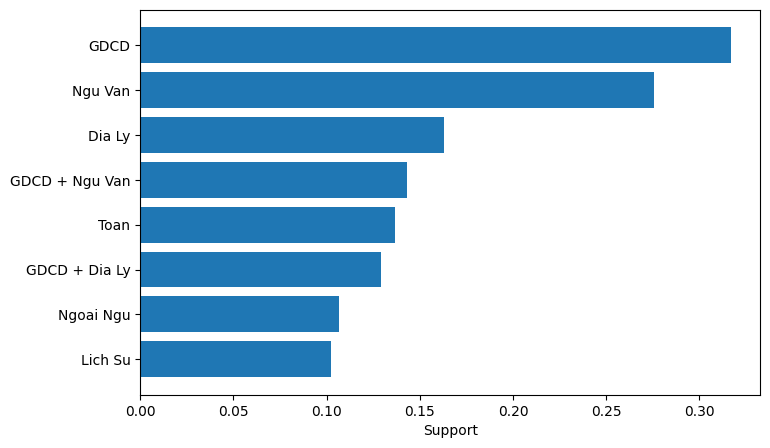

In [34]:
plt.figure(figsize=(8,5))
plt.barh([' + '.join(i) for i in top_sets['itemsets']], top_sets['support'])
plt.xlabel('Support')
plt.gca().invert_yaxis()
plt.show()

# Câu 4: Sinh và phân tích Luật kết hợp

In [35]:
from mlxtend.frequent_patterns import association_rules

In [37]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("5 luật kết hợp có Lift cao nhất (với Confidence >= 50%):")
rules.sort_values(by='lift', ascending=False).head(5)

5 luật kết hợp có Lift cao nhất (với Confidence >= 50%):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Dia Ly),(GDCD),0.1628,0.3168,0.12892,0.791892,2.499659,1.0,0.077345,3.282909,0.716609,0.367629,0.695392,0.599418
1,(Ngu Van),(GDCD),0.2757,0.3168,0.14292,0.518390,1.636331,1.0,0.055578,1.418574,0.536900,0.317897,0.295067,0.484763


# *Mở rộng với FP-Growth

In [38]:
# 1) FP-Growth với cùng ngưỡng như Apriori để so sánh công bằng
from mlxtend.frequent_patterns import fpgrowth
from time import perf_counter

min_sup = 0.1  # giống Apriori

t0 = perf_counter()
fi_fp = fpgrowth(df_trans, min_support=min_sup, use_colnames=True)
t_fp = perf_counter() - t0

print(f"Số tập phổ biến (FP-Growth): {len(fi_fp)}")
print(f"Thời gian FP-Growth: {t_fp:.3f} giây")

fi_fp.sort_values('support', ascending=False).head(10)

Số tập phổ biến (FP-Growth): 8
Thời gian FP-Growth: 1.472 giây


,support,itemsets
0,0.31680,(GDCD)
1,0.27570,(Ngu Van)
4,0.16280,(Dia Ly)
6,0.14292,"(GDCD, Ngu Van)"
5,0.13660,(Toan)
7,0.12892,"(GDCD, Dia Ly)"
2,0.10662,(Ngoai Ngu)
3,0.10226,(Lich Su)


In [39]:
# Đưa itemsets về dạng frozenset để so sánh
ap_sets = set(map(frozenset, frequent_itemsets['itemsets']))
fp_sets = set(map(frozenset, fi_fp['itemsets']))

only_ap = ap_sets - fp_sets
only_fp = fp_sets - ap_sets
both   = ap_sets & fp_sets

print(f"- Chỉ Apriori có   : {len(only_ap)}")
print(f"- Chỉ FP-Growth có : {len(only_fp)}")
print(f"- Cả hai cùng có   : {len(both)}")
print(f"- Jaccard similarity: {len(both) / len(ap_sets | fp_sets):.3f}")

# Liệt kê vài tập khác nhau (nếu có)
list(only_fp)[:5], list(only_ap)[:5]

- Chỉ Apriori có   : 0
- Chỉ FP-Growth có : 0
- Cả hai cùng có   : 8
- Jaccard similarity: 1.000


([], [])

# Sinh luật kết hợp từ FP-Growth & so sánh top luật

In [40]:
from mlxtend.frequent_patterns import association_rules

min_conf = 0.70

rules_ap = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
rules_fp = association_rules(fi_fp,              metric="confidence", min_threshold=min_conf)

print(f"Số luật (Apriori): {len(rules_ap)}")
print(f"Số luật (FP)     : {len(rules_fp)}")

# Top 5 theo lift
top_ap = rules_ap.sort_values('lift', ascending=False).head(5)
top_fp = rules_fp.sort_values('lift', ascending=False).head(5)

print("\nTop 5 luật (Apriori) theo lift:")
display(top_ap[['antecedents','consequents','support','confidence','lift']])

print("\nTop 5 luật (FP-Growth) theo lift:")
display(top_fp[['antecedents','consequents','support','confidence','lift']])


Số luật (Apriori): 1
Số luật (FP)     : 1

Top 5 luật (Apriori) theo lift:


,antecedents,consequents,support,confidence,lift
0,(Dia Ly),(GDCD),0.12892,0.791892,2.499659



Top 5 luật (FP-Growth) theo lift:


,antecedents,consequents,support,confidence,lift
0,(Dia Ly),(GDCD),0.12892,0.791892,2.499659
